In [0]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [2]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

x


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [25]:
# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [5]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


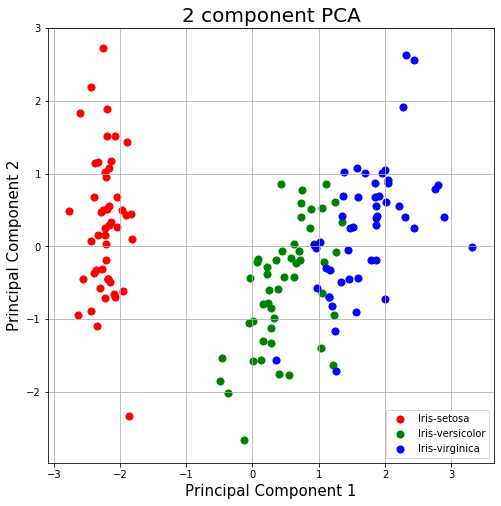

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [7]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

In [0]:
iris = datasets.load_iris()

In [0]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [0]:
model = PCA(n_components=2)

In [0]:
feat = df.iloc[:,0:4]

In [14]:
model.fit(feat)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
mean = model.mean_
mean

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [16]:
first_pc = model.components_[0,:]
first_pc

array([ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ])

In [0]:
transformed = model.transform(feat)

In [18]:
print(transformed)

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

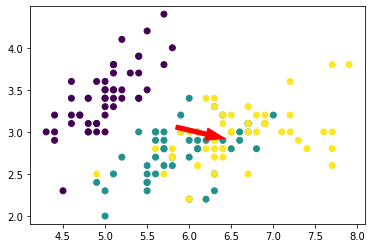

In [19]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = df.iloc[:,-1])
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.05)
plt.axis('equal')
plt.show()

In [20]:
features = range(model.n_components_)
features

range(0, 2)

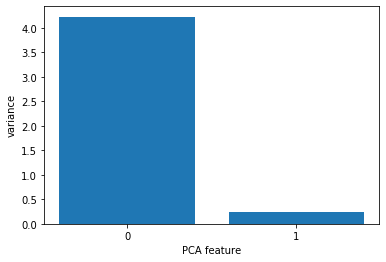

[4.22824171 0.24267075]


In [26]:
plt.bar(features, model.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()
print(model.explained_variance_)

In [22]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components = 2)

# Fit the PCA instance to the scaled samples
pca.fit(df.iloc[:,0:4])

# Transform the scaled samples: pca_features
pca_features = pca.transform(df.iloc[:,0:4])

# Print the shape of pca_features
print(pca_features.shape)

(150, 2)


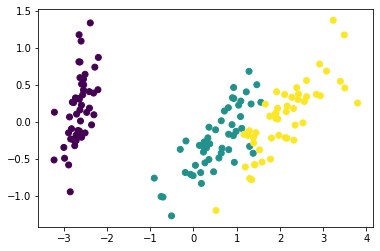

In [23]:
xs = pca_features[:,0]
ys = pca_features[:,1]

plt.scatter(xs, ys, c = df.iloc[:,-1])
plt.show()